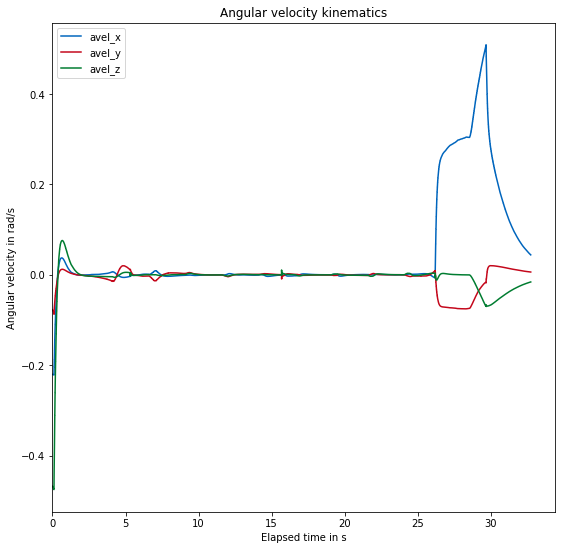

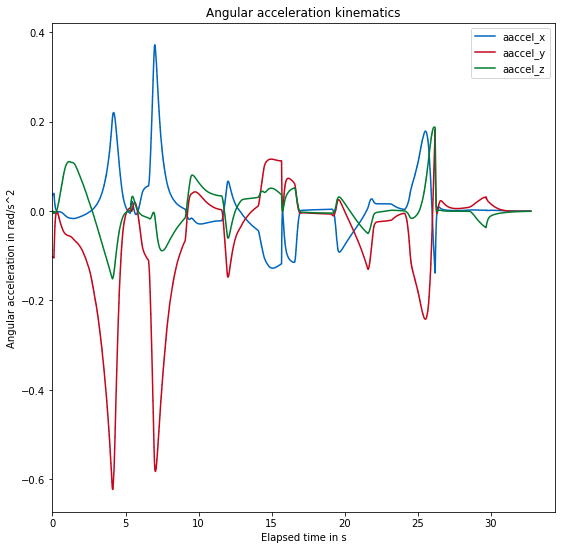

In [7]:
#!/usr/bin/env python3

# read text files and plot them

import matplotlib.pyplot as plt
import numpy as np
import sys
from scipy import signal, fftpack
from scipy.signal import savgol_filter


##Just to test


file = np.loadtxt("data_file_03-11-19_02-11-39" ,skiprows=1)
#print(file)
q = file[1::,1:5]
q_hat = file[1::,5:9]
avel = file[1::,9:12]
avel_hat = file[1::,12:15]
aaccel = file[1::,15:18]
aaccel_hat = file[1::,18:21]

time = np.arange(np.size(q[:,0]))
time = time/1000

#TUM colors rgb
blue = (0,0.3961,0.7412)
red = (0.7686,0.0275,0.1059)
green =(0,0.4863,0.1882)
orange =  (0.8902, 0.4471, 0.1333)
purple = (0.4118, 0.0314, 0.3529)
grey = (0.6118, 0.6157, 0.6235)
yellow = (0.9765, 0.7294, 0)

avel_gradient_x = np.gradient(avel[:,0])
avel_gradient_y = np.gradient(avel[:,1])
avel_gradient_z = np.gradient(avel[:,2])

def filter_signal_SG(data, window_length, polyorder, deriv):
    filtered_data = savgol_filter(data, window_length, polyorder, deriv)
    return filtered_data

avel_savgol_x = filter_signal_SG(avel[:,0],351,7,0)
avel_savgol_y = filter_signal_SG(avel[:,1],351,7,0)
avel_savgol_z = filter_signal_SG(avel[:,2],351,7,0)

avel_dot_savgol_x = filter_signal_SG(avel_savgol_x,51,7,0)
avel_dot_savgol_y = filter_signal_SG(avel_savgol_y,51,7,0)
avel_dot_savgol_z = filter_signal_SG(avel_savgol_z,51,7,0)



def PlotNoLimOne(time, F_x1, F_y1, F_z1, label_name_x1,label_name_y1, label_name_z1, axis_label_x, axis_label_y,title, savename):
	plt.figure(figsize=(9,9))
	plt.plot(time, F_x1, c=blue, label = label_name_x1)
	plt.plot(time, F_y1, c=red, label = label_name_y1)
	plt.plot(time, F_z1, c=green, label = label_name_z1)
	plt.xlabel(axis_label_x)
	plt.ylabel(axis_label_y)
	plt.xlim(xmin=0)
	plt.title(title)
	plt.legend()
	plt.savefig(savename)
    
def PlotCompare(counter, time, x_1, x_2, y_1, y_2, z_1, z_2, title_1, title_2, title_3, label_1, label_2):
	plt.figure(counter, figsize=(7,8))
	plt.subplot(311)
	plt.tight_layout()
	plt.plot(time, x_1, c=blue, label= label_1)
	plt.plot(time, x_2, c=red, label= label_2)
	plt.title(title_1)
	plt.legend()
	# plt.xlabel("Elapsed time in s")
	plt.subplot(312)
	plt.tight_layout()
	plt.plot(time, y_1, c=blue, label= label_1)
	plt.plot(time, y_2, c=red, label= label_2)
	plt.title(title_2)
	plt.legend()
	# plt.xlabel("Elapsed time in s")
	plt.subplot(313)
	plt.tight_layout()
	plt.plot(time, z_1, c=blue, label= label_1)
	plt.plot(time, z_2, c=red, label= label_2)
	plt.title(title_3)
	plt.legend()



PlotNoLimOne(time, avel[:,0],avel[:,1],avel[:,2], "avel_x","avel_y", "avel_z", "Elapsed time in s", "Angular velocity in rad/s", "Angular velocity kinematics", "avel_kin.png")
PlotNoLimOne(time, aaccel[:,0],aaccel[:,1],aaccel[:,2], "aaccel_x","aaccel_y", "aaccel_z", "Elapsed time in s", "Angular acceleration in rad/s^2", "Angular acceleration kinematics", "aaccel_kin.png")




-8.144156324208641e-19
2.4591439995447217e-14


Text(0.5, 1.0, 'FFT angular acceleration')

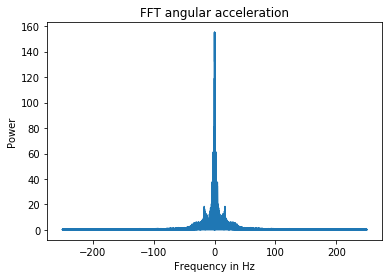

In [61]:
sig = aaccel[:,0] - np.mean(aaccel[:,0])
print(np.mean(sig))
sig_fft = fftpack.fft(sig)
power = np.abs(sig_fft)
print(power[0])
sample_freq = fftpack.fftfreq(sig.size, d= 1/500)
plt.figure()
plt.plot(sample_freq, power)
plt.xlabel("Frequency in Hz")
plt.ylabel("Power")
plt.title("FFT angular acceleration")

In [12]:
PlotNoLimOne(time, avel[:,0],avel[:,1],avel[:,2], "avel_x","avel_y", "avel_z", "time in s", "deg s", savename)

NameError: name 'PlotNoLimOne' is not defined

iteration    1: relative change = 1.145e+00, gradient norm = 1.318e+01

iteration    1: relative change = 3.972e-02, gradient norm = 3.845e+01

iteration    2: relative change = 3.039e-02, gradient norm = 6.013e+00

iteration    3: relative change = 2.280e-03, gradient norm = 1.528e+00

iteration    4: relative change = 7.382e-05, gradient norm = 3.077e-01

iteration    5: relative change = 1.362e-06, gradient norm = 6.056e-02

iteration    6: relative change = 4.413e-09, gradient norm = 1.224e-02

iteration    7: relative change = 4.520e-09, gradient norm = 2.581e-03

iteration    8: relative change = 1.023e-09, gradient norm = 5.664e-04

iteration    9: relative change = 1.873e-10, gradient norm = 1.286e-04

iteration   10: relative change = 0.000e+00, gradient norm = 2.997e-05

iteration   11: relative change = 0.000e+00, gradient norm = 2.997e-05

iteration   12: relative change = 0.000e+00, gradient norm = 2.997e-05

iteration   13: relative change = 0.000e+00, gradient norm = 2.9

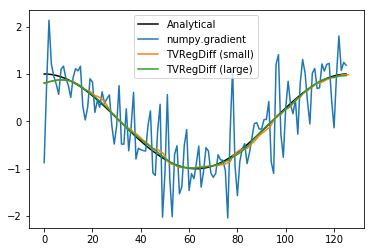

In [77]:
#!/usr/bin/env python

# u = TVRegDiff( data, iter, alph, u0, scale, ep, dx, plotflag, diagflag );
#
# Rick Chartrand (rickc@lanl.gov), Apr. 10, 2011
# Please cite Rick Chartrand, "Numerical differentiation of noisy,
# nonsmooth data," ISRN Applied Mathematics, Vol. 2011, Article ID 164564,
# 2011.
#
# Inputs:  (First three required; omitting the final N parameters for N < 7
#           or passing in [] results in default values being used.)
#       data        Vector of data to be differentiated.
#
#       iter        Number of iterations to run the main loop.  A stopping
#                   condition based on the norm of the gradient vector g
#                   below would be an easy modification.  No default value.
#
#       alph        Regularization parameter.  This is the main parameter
#                   to fiddle with.  Start by varying by orders of
#                   magnitude until reasonable results are obtained.  A
#                   value to the nearest power of 10 is usally adequate.
#                   No default value.  Higher values increase
#                   regularization strenght and improve conditioning.
#
#       u0          Initialization of the iteration.  Default value is the
#                   naive derivative (without scaling), of appropriate
#                   length (this being different for the two methods).
#                   Although the solution is theoretically independent of
#                   the initialization, a poor choice can exacerbate
#                   conditioning issues when the linear system is solved.
#
#       scale       'large' or 'small' (case insensitive).  Default is
#                   'small'.  'small' has somewhat better boundary
#                   behavior, but becomes unwieldly for data larger than
#                   1000 entries or so.  'large' has simpler numerics but
#                   is more efficient for large-scale problems.  'large' is
#                   more readily modified for higher-order derivatives,
#                   since the implicit differentiation matrix is square.
#
#       ep          Parameter for avoiding division by zero.  Default value
#                   is 1e-6.  Results should not be very sensitive to the
#                   value.  Larger values improve conditioning and
#                   therefore speed, while smaller values give more
#                   accurate results with sharper jumps.
#
#       dx          Grid spacing, used in the definition of the derivative
#                   operators.  Default is the reciprocal of the data size.
#
#       plotflag    Flag whether to display plot at each iteration.
#                   Default is 1 (yes).  Useful, but adds significant
#                   running time.
#
#       diagflag    Flag whether to display diagnostics at each
#                   iteration.  Default is 1 (yes).  Useful for diagnosing
#                   preconditioning problems.  When tolerance is not met,
#                   an early iterate being best is more worrying than a
#                   large relative residual.
#
# Output:
#
#       u           Estimate of the regularized derivative of data.  Due to
#                   different grid assumptions, length( u ) =
#                   length( data ) + 1 if scale = 'small', otherwise
#                   length( u ) = length( data ).

# Copyright notice:
# Copyright 2010. Los Alamos National Security, LLC. This material
# was produced under U.S. Government contract DE-AC52-06NA25396 for
# Los Alamos National Laboratory, which is operated by Los Alamos
# National Security, LLC, for the U.S. Department of Energy. The
# Government is granted for, itself and others acting on its
# behalf, a paid-up, nonexclusive, irrevocable worldwide license in
# this material to reproduce, prepare derivative works, and perform
# publicly and display publicly. Beginning five (5) years after
# (March 31, 2011) permission to assert copyright was obtained,
# subject to additional five-year worldwide renewals, the
# Government is granted for itself and others acting on its behalf
# a paid-up, nonexclusive, irrevocable worldwide license in this
# material to reproduce, prepare derivative works, distribute
# copies to the public, perform publicly and display publicly, and
# to permit others to do so. NEITHER THE UNITED STATES NOR THE
# UNITED STATES DEPARTMENT OF ENERGY, NOR LOS ALAMOS NATIONAL
# SECURITY, LLC, NOR ANY OF THEIR EMPLOYEES, MAKES ANY WARRANTY,
# EXPRESS OR IMPLIED, OR ASSUMES ANY LEGAL LIABILITY OR
# RESPONSIBILITY FOR THE ACCURACY, COMPLETENESS, OR USEFULNESS OF
# ANY INFORMATION, APPARATUS, PRODUCT, OR PROCESS DISCLOSED, OR
# REPRESENTS THAT ITS USE WOULD NOT INFRINGE PRIVATELY OWNED
# RIGHTS.

# BSD License notice:
# Redistribution and use in source and binary forms, with or without
# modification, are permitted provided that the following conditions
# are met:
#
#      Redistributions of source code must retain the above
#      copyright notice, this list of conditions and the following
#      disclaimer.
#      Redistributions in binary form must reproduce the above
#      copyright notice, this list of conditions and the following
#      disclaimer in the documentation and/or other materials
#      provided with the distribution.
#      Neither the name of Los Alamos National Security nor the names of its
#      contributors may be used to endorse or promote products
#      derived from this software without specific prior written
#      permission.
#
# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND
# CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES,
# INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF
# MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
# DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR
# CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL,
# SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT
# LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF
# USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED
# AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT
# LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN
# ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE
# POSSIBILITY OF SUCH DAMAGE.
#
#########################################################
#                                                       #
# Python translation by Simone Sturniolo                #
# Rutherford Appleton Laboratory, STFC, UK (2014)       #
# simonesturniolo@gmail.com                             #
#                                                       #
#########################################################

import sys

try:
    import numpy as np
    import scipy as sp
    from scipy import sparse
    from scipy.sparse import linalg as splin
except ImportError:
    sys.exit("Numpy and Scipy must be installed for TVRegDiag to work - "
             "aborting")

_has_matplotlib = True

try:
    import matplotlib.pyplot as plt
except ImportError:
    _has_matplotlib = False
    print("Matplotlib is not installed - plotting functionality disabled")

# Utility function.


def chop(v):
    return v[1:]


def TVRegDiff(data, itern, alph, u0=None, scale='small', ep=1e-6, dx=None,
              plotflag=_has_matplotlib, diagflag=1):

    # code starts here
    # Make sure we have a column vector
    data = np.array(data)
    if (len(data.shape) != 1):
        print("Error - data is not a column vector")
        return
    # Get the data size.
    n = len(data)

    # Default checking. (u0 is done separately within each method.)
    if dx is None:
        dx = 1.0 / n

    # Different methods for small- and large-scale problems.
    if (scale.lower() == 'small'):

        # Construct differentiation matrix.
        c = np.ones(n + 1) / dx
        D = sparse.spdiags([-c, c], [0, 1], n, n + 1)

        DT = D.transpose()

        # Construct antidifferentiation operator and its adjoint.
        def A(x): return chop(np.cumsum(x) - 0.5 * (x + x[0])) * dx

        def AT(w): return (sum(w) * np.ones(n + 1) -
                           np.transpose(np.concatenate(([sum(w) / 2.0],
                                                        np.cumsum(w) -
                                                        w / 2.0)))) * dx

        # Default initialization is naive derivative

        if u0 is None:
            u0 = np.concatenate(([0], np.diff(data), [0]))

        u = u0
        # Since Au( 0 ) = 0, we need to adjust.
        ofst = data[0]
        # Precompute.
        ATb = AT(ofst - data)        # input: size n

        # Main loop.
        for ii in range(1, itern+1):
            # Diagonal matrix of weights, for linearizing E-L equation.
            Q = sparse.spdiags(1. / (np.sqrt((D * u)**2 + ep)), 0, n, n)
            # Linearized diffusion matrix, also approximation of Hessian.
            L = dx * DT * Q * D

            # Gradient of functional.
            g = AT(A(u)) + ATb + alph * L * u

            # Prepare to solve linear equation.
            tol = 1e-4
            maxit = 100
            # Simple preconditioner.
            P = alph * sparse.spdiags(L.diagonal() + 1, 0, n + 1, n + 1)

            def linop(v): return (alph * L * v + AT(A(v)))
            linop = splin.LinearOperator((n + 1, n + 1), linop)

            if diagflag:
                [s, info_i] = sparse.linalg.cg(
                    linop, g, x0=None, tol=tol, maxiter=maxit, callback=None,
                    M=P)
                print('iteration {0:4d}: relative change = {1:.3e}, '
                      'gradient norm = {2:.3e}\n'.format(ii,
                                                         np.linalg.norm(
                                                             s[0]) /
                                                         np.linalg.norm(u),
                                                         np.linalg.norm(g)))
                if (info_i > 0):
                    print("WARNING - convergence to tolerance not achieved!")
                elif (info_i < 0):
                    print("WARNING - illegal input or breakdown")
            else:
                [s, info_i] = sparse.linalg.cg(
                    linop, g, x0=None, tol=tol, maxiter=maxit, callback=None,
                    M=P)
            # Update solution.
            u = u - s
            # Display plot.
            if plotflag:
                plt.plot(u)
                plt.show()

    elif (scale.lower() == 'large'):

        # Construct antidifferentiation operator and its adjoint.
        def A(v): return np.cumsum(v)

        def AT(w): return (sum(w) * np.ones(len(w)) -
                           np.transpose(np.concatenate(([0.0],
                                                        np.cumsum(w[:-1])))))
        # Construct differentiation matrix.
        c = np.ones(n)
        D = sparse.spdiags([-c, c], [0, 1], n, n) / dx
        mask = np.ones((n, n))
        mask[-1, -1] = 0.0
        D = sparse.dia_matrix(D.multiply(mask))
        DT = D.transpose()
        # Since Au( 0 ) = 0, we need to adjust.
        data = data - data[0]
        # Default initialization is naive derivative.
        if u0 is None:
            u0 = np.concatenate(([0], np.diff(data)))
        u = u0
        # Precompute.
        ATd = AT(data)

        # Main loop.
        for ii in range(1, itern + 1):
            # Diagonal matrix of weights, for linearizing E-L equation.
            Q = sparse.spdiags(1. / np.sqrt((D*u)**2.0 + ep), 0, n, n)
            # Linearized diffusion matrix, also approximation of Hessian.
            L = DT*Q*D
            # Gradient of functional.
            g = AT(A(u)) - ATd
            g = g + alph * L * u
            # Build preconditioner.
            c = np.cumsum(range(n, 0, -1))
            B = alph * L + sparse.spdiags(c[::-1], 0, n, n)
            # droptol = 1.0e-2
            R = sparse.dia_matrix(np.linalg.cholesky(B.todense()))
            # Prepare to solve linear equation.
            tol = 1.0e-4
            maxit = 100

            def linop(v): return (alph * L * v + AT(A(v)))
            linop = splin.LinearOperator((n, n), linop)

            if diagflag:
                [s, info_i] = sparse.linalg.cg(
                    linop, -g, x0=None, tol=tol, maxiter=maxit, callback=None,
                    M=np.dot(R.transpose(), R))
                print('iteration {0:4d}: relative change = {1:.3e}, '
                      'gradient norm = {2:.3e}\n'.format(ii,
                                                         np.linalg.norm(s[0]) /
                                                         np.linalg.norm(u),
                                                         np.linalg.norm(g)))
                if (info_i > 0):
                    print("WARNING - convergence to tolerance not achieved!")
                elif (info_i < 0):
                    print("WARNING - illegal input or breakdown")

            else:
                [s, info_i] = sparse.linalg.cg(
                    linop, -g, x0=None, tol=tol, maxiter=maxit, callback=None,
                    M=np.dot(R.transpose(), R))
            # Update current solution
            u = u + s
            # Display plot.
            if plotflag:
                plt.plot(u/dx)
                plt.show()

        u = u/dx

    return u

# Small testing script


if __name__ == "__main__":

    dx = 0.05
    x0 = np.arange(0, 2.0*np.pi, dx)

    testf = np.sin(x0)

    testf = testf + np.random.normal(0.0, 0.04, x0.shape)

    deriv_sm = TVRegDiff(testf, 1, 5e-2, dx=dx,
                         ep=1e-1, scale='small', plotflag=0)
    deriv_lrg = TVRegDiff(testf, 100, 1e-1, dx=dx,
                          ep=1e-2, scale='large', plotflag=0)

    if (_has_matplotlib):
        plt.plot(np.cos(x0), label='Analytical', c=(0,0,0))
        plt.plot(np.gradient(testf, dx), label='numpy.gradient')
        plt.plot(deriv_sm, label='TVRegDiff (small)')
        plt.plot(deriv_lrg, label='TVRegDiff (large)')
        plt.legend()
        plt.show()